In [1]:
# Building environment for minimal testing; does not require installation from pip
# Check and install minimal dependencies for TPHATE testing
import sys
import subprocess

def install_if_missing(package):
    try:
        __import__(package)
        print(f"✅ {package} is already installed")
    except ImportError:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Core dependencies needed for TPHATE functionality
core_packages = [
    "numpy",
    "scipy", 
    "scikit-learn",
    "matplotlib",
    "pygsp",
    "tasklogger",
    "graphtools",
    "statsmodels",
    "s_gd2",
    "deprecated"
]

print("Installing TPHATE core dependencies...")
for package in core_packages:
    install_if_missing(package)

print("\n✅ All core dependencies installed successfully!")


Installing TPHATE core dependencies...
✅ numpy is already installed
✅ scipy is already installed
📦 Installing scikit-learn...
✅ matplotlib is already installed
✅ pygsp is already installed
✅ tasklogger is already installed
✅ graphtools is already installed
✅ statsmodels is already installed
✅ s_gd2 is already installed
✅ deprecated is already installed

✅ All core dependencies installed successfully!


In [2]:
# Add the local TPHATE development path
import sys
sys.path.insert(0, '..')

%load_ext autoreload
%autoreload 2
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import tphate

# Verify we're using the local development version
print(f"TPHATE version: {tphate.__version__}")
print(f"TPHATE path: {tphate.__file__}")
print("\n✅ TPHATE imported successfully from build path")

TPHATE version: 1.2.1
TPHATE path: /Users/elb/Desktop/code_packages_maintainer_version/TPHATE/TPHATE/examples/../tphate/__init__.py

✅ TPHATE imported successfully from build path


In [3]:
# Generate random autocorrelative data
def f(x, a, sigma):
    noisy = a*x + np.random.normal(0.0, sigma, size=x.shape)
    return noisy

features, samples=100,80
X = np.ones((features, samples))*np.arange(samples)
Ys = np.array([f(x, 2, 10) for x in X]).T # want samples x features input (timepoints by voxels)
Ys.shape

(80, 100)

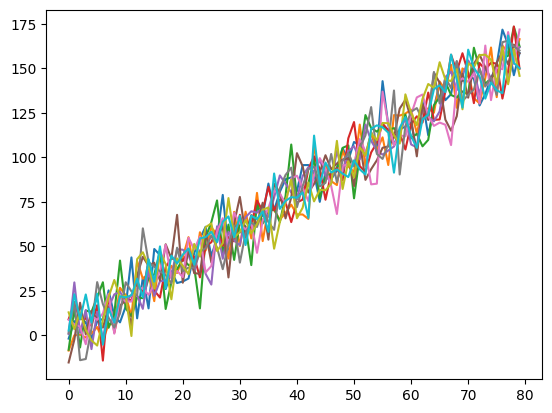

In [4]:
# plot data
_=plt.plot(Ys[:,::10])

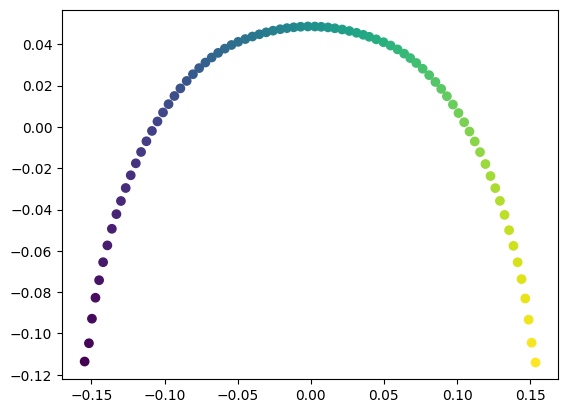

In [5]:
# Embed with tphate
tphate_op = tphate.TPHATE(n_jobs=-1, verbose=0, t=5, 
                          mds='metric', mds_solver='sgd', smooth_window=4)
embedding = tphate_op.fit_transform(Ys)
plt.scatter(embedding[:,0], embedding[:,1], c=np.arange(80))

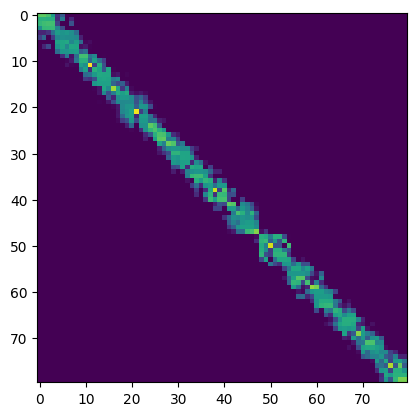

In [6]:
# Plot the PHATE diffusion operator
plt.imshow(tphate_op.phate_diffop)

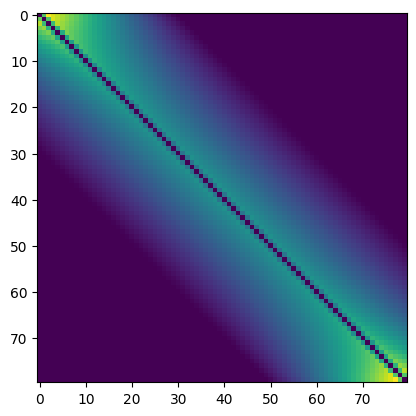

In [7]:
# plot the autocorrelation kernel
plt.imshow(tphate_op.autocorr_op)

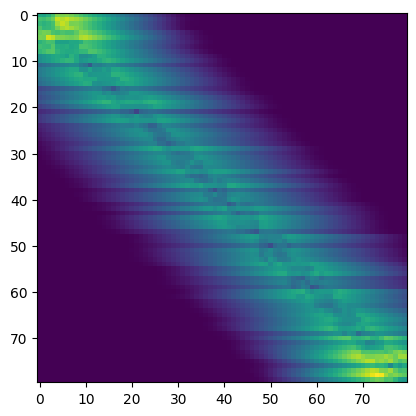

In [8]:
# Plot the combined TPHATE diffusion op
plt.imshow(tphate_op.diff_op)

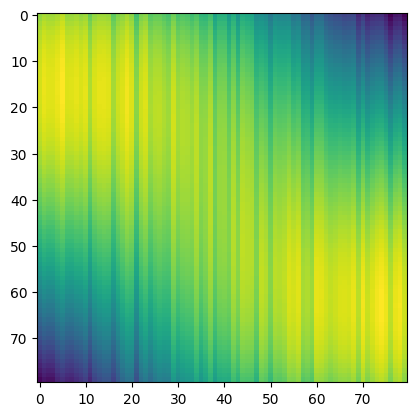

In [9]:
plt.imshow(tphate_op._diff_potential)

In [10]:
ds = np.load('../data/sub-04_aud_early_sherlock_movie.npy')

In [11]:
tphate_op = tphate.TPHATE(verbose=1, n_components=2, t=4, n_jobs=-1)
embedding = tphate_op.fit_transform(ds)

Calculating TPHATE...
  Running TPHATE on 1976 observations and 1018 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.12 seconds.
  Learning the autocorrelation function...
  Calculating Autocorr kernel...
    Dropoff point: 28
  Combining PHATE operator and autocorr operator
  Calculating diffusion potential...
  Calculated diffusion potential in 0.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.19 seconds.
Calculated TPHATE in 4.02 seconds.


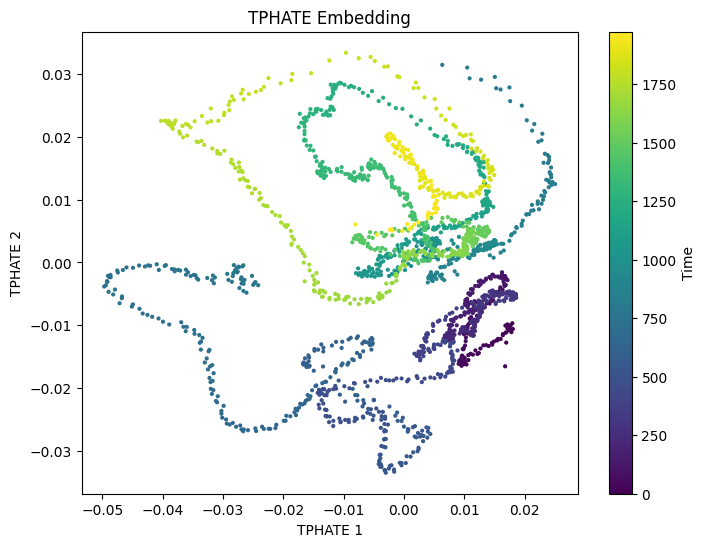

In [12]:
# Plot embedding using matplotlib instead of scprep (since scprep is no longer a dependency)
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.arange(len(embedding)), cmap='viridis', s=4)
plt.colorbar(label='Time')
plt.xlabel('TPHATE 1')
plt.ylabel('TPHATE 2')
plt.title('TPHATE Embedding')
plt.show()

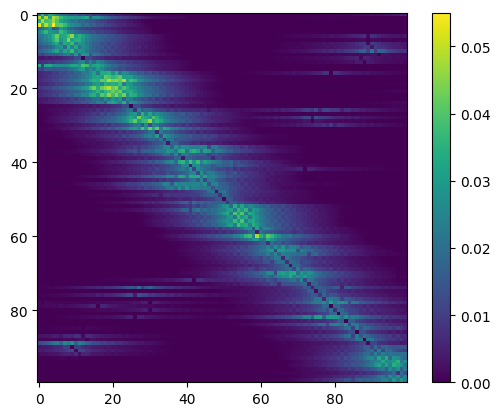

In [13]:
plt.imshow(tphate_op.diff_op[:100,:100])
plt.colorbar()

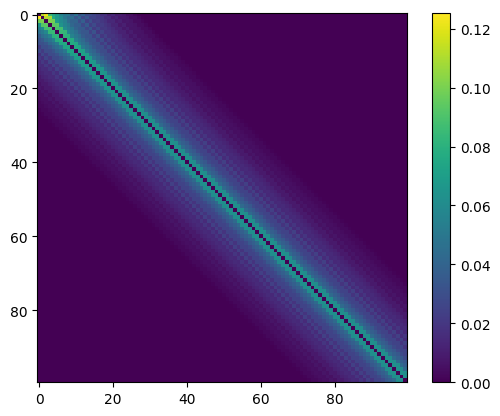

In [14]:
plt.imshow(tphate_op.autocorr_op[:100,:100])
plt.colorbar()

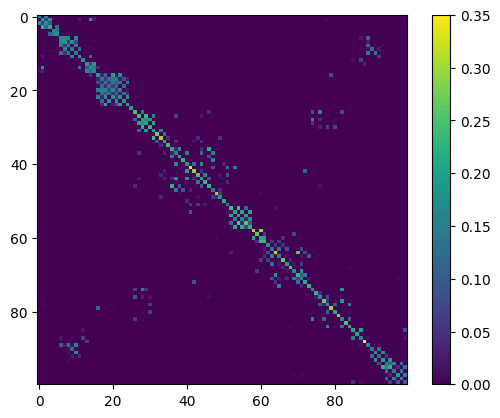

In [15]:
plt.imshow(tphate_op.phate_diffop[:100,:100])
plt.colorbar()

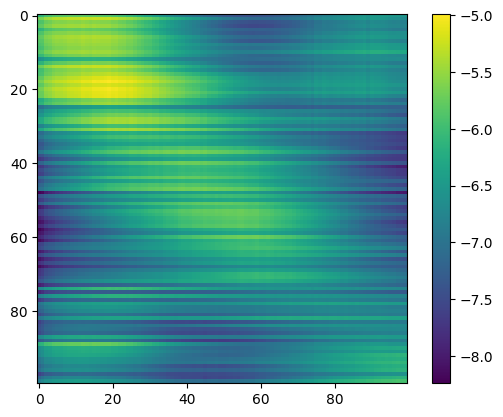

In [16]:
plt.imshow(tphate_op.diff_potential[:100,:100])
plt.colorbar()

In [17]:
tphate_op.dropoff

np.int64(28)